In [44]:
import pandas as pd

positif = pd.read_excel('positif.xlsx', index_col=0)
positif['label'] = 0
negatif = pd.read_excel('negatif.xlsx', index_col=0)
negatif['label'] = 1

df = pd.concat([positif, negatif], ignore_index=True)
df.head()


,text,label
0,Gaji guru sebesar jutaan rupiah telah disalurk...,0
1,Ganjar Mahfud menargetkan pengembangan desa da...,0
2,Calon presiden nomor urut Anies Baswedan berka...,0
3,"Anies menghabiskan pagi di Tanah Merah, Koja, ...",0
4,Generasi muda mengekspresikan penyesalan terha...,0


In [45]:
import re
import emoji
import string
import pandas as pd

def preprocess_text(original_text):
    # Menghapus URL
    processed_text = re.sub(r'http\S+', '', original_text)

    # Menghapus username Twitter (@user123)
    processed_text = re.sub(r'@\w+', '', processed_text)

    # Menghapus hashtag (#PythonProgramming)
    processed_text = re.sub(r'#\w+', '', processed_text)

    # Menghapus karakter yang berulang, lebih dari 2 kali
    processed_text = re.sub(r'(\w)\1{2,}', r'\1', processed_text)

    # Membersihkan emoji tanpa menghapus
    emojis = set([char for word in processed_text.split() for char in list(word) if char in emoji.UNICODE_EMOJI])
    emojis_names = [emoji.demojize(e).replace(':', '').replace('_', ' ') for e in emojis]
    processed_text = processed_text + ' ' + ' '.join(emojis_names)

    # Menghapus tanda baca
    processed_text = processed_text.translate(str.maketrans('', '', string.punctuation))

    # Menghapus angka
    processed_text = re.sub(r'\d+', '', processed_text)

    return processed_text.strip().lower()

# Applying the preprocess_text function to the 'full_text' column
df['text'] = df['text'].apply(lambda x: preprocess_text(x))


In [46]:
indo_slang_word = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")
slang_to_formal = dict(zip(indo_slang_word['slang'], indo_slang_word['formal']))

# Fungsi normalisasi teks
def normalize_text(text):
    words = text.split()  # Memecah teks menjadi kata-kata
    normalized_words = []
    for word in words:
        if word in slang_to_formal:
            normalized_words.append(slang_to_formal[word])
        else:
            normalized_words.append(word)
    normalized_text = ' '.join(normalized_words)  # Menggabungkan kata-kata kembali menjadi teks
    return normalized_text

df['text'] = df['text'].apply(normalize_text)

In [47]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tweet):
    text = [stemmer.stem(word) for word in tweet]
    return tweet

df['text'] = df['text'].apply(lambda x: stemming(x))

In [48]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt','lg','min','kak','kah','no','deh','kayak','ky','woy','gue','hai','halo',
                       '&amp', 'yah','an','my','ane','btw','lu',"b", "e",'blok','a','duh','apa','om','lho','dear','minn','hi','iki','zimi','fo','iya','guys','l','tks',
                       'tbtb','yuk','pas','hm','heh','fax','lo','cuk','mas','eh'])

# Baca daftar stopword dari URL
stopwords_url = 'https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt'
stopwords_df = pd.read_csv(stopwords_url, header=None, names=['stopword'])
stopwords_list = stopwords_df['stopword'].tolist()

def remove_stopwords(text):
    words = word_tokenize(str(text))
    filtered_words = [word for word in words if word.lower() not in list_stopwords]
    return ' '.join(filtered_words)

df['text'] = df['text'].apply(remove_stopwords)


In [49]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd

# Membuat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()


# Menerapkan penghapusan stopword pada kolom 'text'
df['text'] = df['text'].apply(stopword_remover.remove)



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


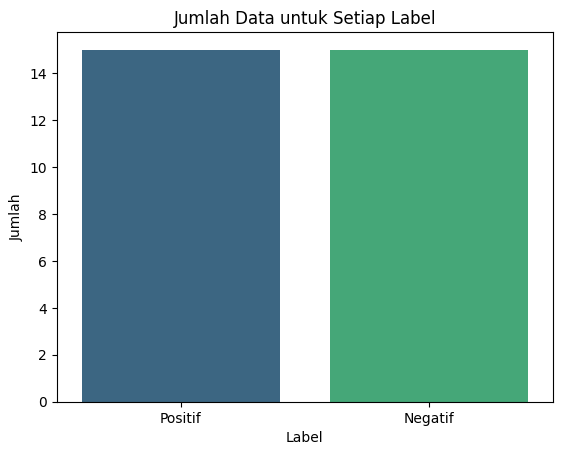

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengganti nilai 'label' dari 0 menjadi 'Positif' dan 1 menjadi 'Negatif'
df['label'] = df['label'].replace({0: 'Positif', 1: 'Negatif'})

# Membuat DataFrame dengan value counts
value_counts = df['label'].value_counts()

# Membuat diagram batang dengan seaborn
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Jumlah Data untuk Setiap Label')

# Menampilkan diagram
plt.show()


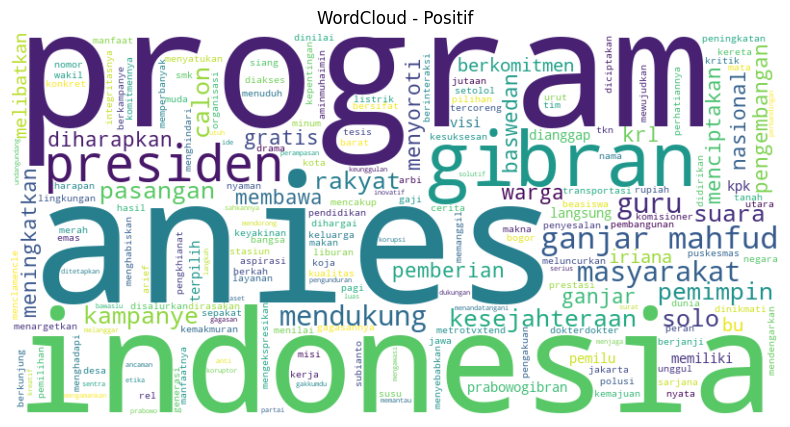

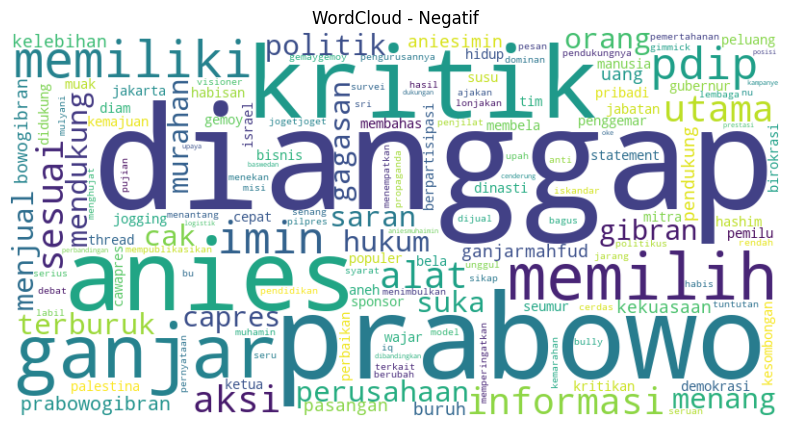

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split dataset berdasarkan label
positif_texts = df[df['label'] == 'Positif']['text']
negatif_texts = df[df['label'] == 'Negatif']['text']

# Fungsi untuk membuat dan menampilkan WordCloud
def show_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat dan menampilkan WordCloud untuk label Positif
show_wordcloud(positif_texts, 'WordCloud - Positif')

# Membuat dan menampilkan WordCloud untuk label Negatif
show_wordcloud(negatif_texts, 'WordCloud - Negatif')


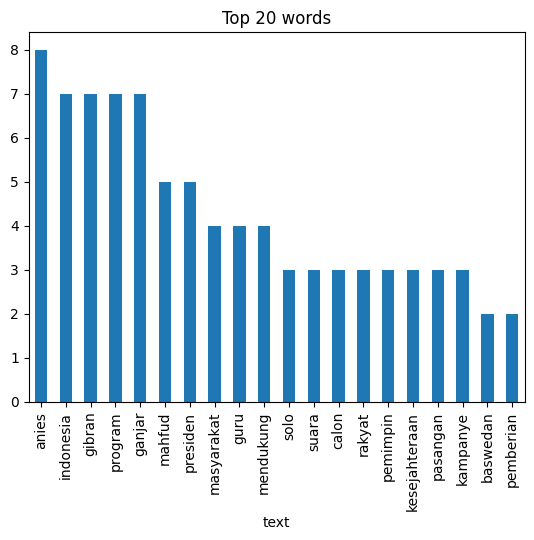

In [52]:
import matplotlib.pyplot as plt
import texthero as hero

NUM_TOP_WORDS = 20

positive = df[df['label']=='Positif']
top_20 = hero.visualization.top_words(positive['text']).head(NUM_TOP_WORDS)


top_20.plot.bar(rot=90, title="Top 20 words");

plt.show(block=True);

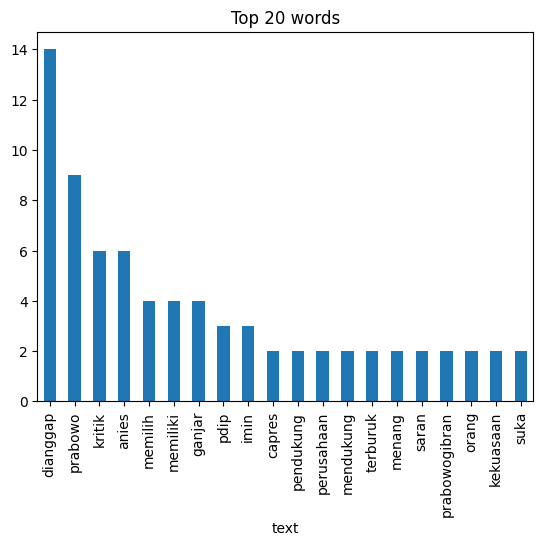

In [53]:
import matplotlib.pyplot as plt
import texthero as hero

NUM_TOP_WORDS = 20

negative = df[df['label']=='Negatif']
top_20 = hero.visualization.top_words(negative['text']).head(NUM_TOP_WORDS)


top_20.plot.bar(rot=90, title="Top 20 words");

plt.show(block=True);